In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
datatrain_addr =  "/content/drive/MyDrive/training_data"

In [3]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
training_data=data_generator.flow_from_directory(datatrain_addr,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_datas=data_generator.flow_from_directory(datatrain_addr,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='categorical',
                                     subset="validation",
                                     shuffle=True,)

Found 136 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [5]:
training_data.class_indices


{'namheo': 0, 'tong': 1, 'tri': 2}

In [84]:
model =Sequential()
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 512)     14336     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 512)       2359808   
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 512)       2359808   
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 17, 17, 512)    

In [90]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(training_data,verbose = 1, epochs=50,validation_data=validation_datas)

Epoch 1/50
7/7 [==============================] - 2s 159ms/step - loss: 9.6419e-09 - accuracy: 1.0000 - val_loss: 3.8217e-06 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 1s 125ms/step - loss: 3.5062e-09 - accuracy: 1.0000 - val_loss: 1.0656e-06 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 1s 125ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.8996e-07 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 1s 124ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.5630e-07 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 1s 124ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.0212e-07 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 1s 128ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.8406e-07 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 1s 124ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

In [91]:
model.evaluate(validation_datas)

2/2 [==============================] - 0s 40ms/step - loss: 6.8996e-07 - accuracy: 1.0000


[6.899610411892354e-07, 1.0]

In [57]:
model.save("face_id_cnn.h5")

In [92]:
datatest_addr = "/content/drive/MyDrive/testing_data"

In [93]:
test= ImageDataGenerator(rescale=1./255)

In [94]:
testing_data=test.flow_from_directory(
                                      datatest_addr,
                                      target_size=(150,150),
                                      batch_size=10,
                                      class_mode='categorical',
                                      shuffle=False, 
                                      )

Found 17 images belonging to 1 classes.


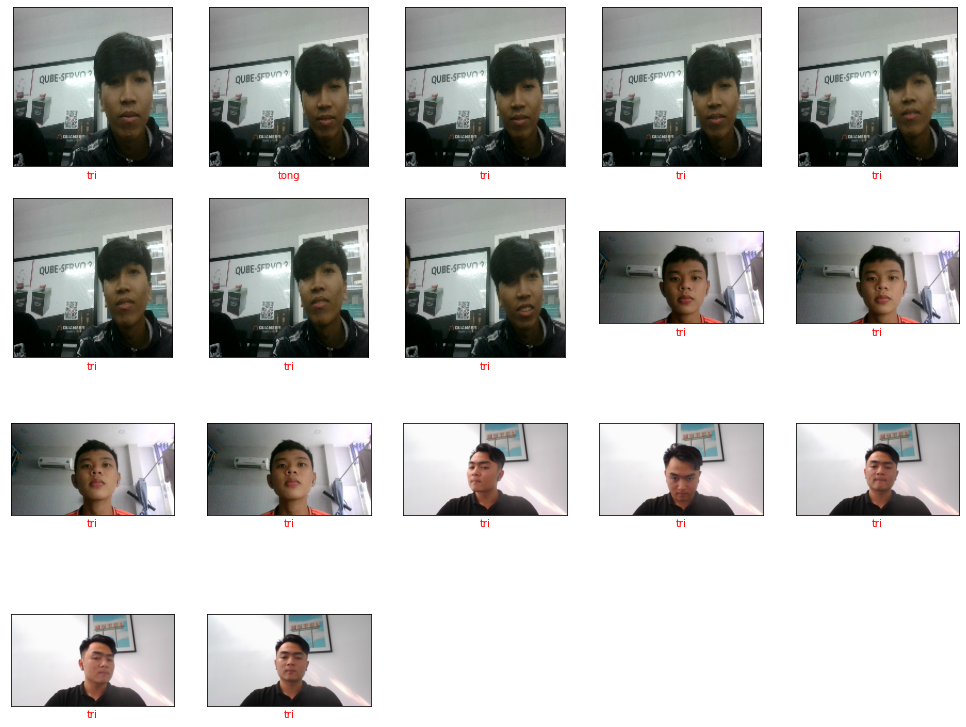

In [95]:
results={ 0:'namheo',1:'tong',2:'tri'}
model = load_model("face_id_cnn.h5")
pred = model.predict(testing_data)
plt.figure(figsize=(17,17))
for i in range(pred.shape[0]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(testing_data.filepaths[i]))
  plt.xlabel(results[np.argmax(pred[i])], color = 'red')
plt.show()